In [33]:
import pandas as pd
from altair import *
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

data = '/media/mcamp/Local SSHD/PythonProjects/Datasets/TwoSigma/train.h5'
store = pd.HDFStore(data)
df = store['train']

In [3]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,-0.179404,NaN,-0.072108,0.249187,0.024401,-0.127942,NaN,1.412742,-0.029575,1.265246,-0.055747,1.592256,-0.285275,-0.212888,0.404180,0.116903,0.197590,-0.197455,-0.195023,-0.059886,-0.021199,-0.013555,-0.236371,-0.253357,0.575562,0.283947,-0.006208,0.616351,-0.034578,0.732652,-0.002432,-0.092508,-0.072185,0.447296,-0.194318,0.264373,0.018763,NaN,-0.145278,-0.108547,0.148189,-0.226942,0.262864,-0.252933,-0.113265,0.180559,-0.033812,0.042951,-0.068031,0.208402,-0.082743,1.061059,1.120801,-0.228200,-0.119987,-0.131929,-0.145985,-0.155989,NaN,0.037680,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.273957,NaN,-2.0,-2.0,NaN,0.001652,-2.0,NaN,-2.0,NaN,0.652981,0.000000,-0.142453,0.0,NaN,NaN,1.427469,NaN,-2.0,0.0,NaN,NaN,NaN,0.0,0.937880,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,0.216281,0.09675,0.082042,-0.224383,-0.085529,0.024763,-0.062337,-0.202247,1.746692,-0.187505,-0.034664,-0.135177,0.305562,0.027595,-0.208746,0.118520,-0.123511,0.113818,NaN,-0.115837,0.028282,0.076565,-0.217346,0.100054,0.358808,0.057505,0.025719,-0.141339,2.293476,0.024945,0.388208,-0.240927,-0.126232,-0.131619,0.232268,-0.001455,-0.489863,0.017317,0.027321,0.334183,0.113513,0.111536,-0.179379,0.221287,-0.091886,NaN,0.107982,0.548687,-0.160079,-0.281368,0.063933,-0.235643,-0.205083,-0.194349,-0.365186,0.041928,-0.044907,-0.039079,-0.075000,-0.280418,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.159432,NaN,0.0,-2.0,NaN,0.004317,0.0,NaN,-2.0,NaN,-0.399520,0.000000,-0.309356,-0.5,NaN,NaN,0.154613,NaN,0.0,0.0,NaN,NaN,NaN,0.5,0.232154,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,NaN,NaN,-0.051418,-0.258330,-0.122140,-0.121041,-0.058287,-0.899515,-0.022131,-0.079002,-0.031116,-0.100603,-0.341474,-0.007522,0.077977,-0.149581,0.036946,0.166182,NaN,0.172751,0.961091,1.028205,-0.165369,0.056006,NaN,0.249530,-0.156078,NaN,0.019192,0.053364,-0.020247,NaN,0.064028,-0.249106,-0.106216,-0.085509,0.383589,NaN,-0.074021,-0.054295,-0.746073,-0.057605,-0.126238,0.462523,0.060902,NaN,-0.262892,-0.059395,0.562975,-0.026392,0.013430,-0.627150,-0.470362,-0.101865,0.436794,-0.057049,-0.120851,-0.061941,-0.600019,0.138357,NaN,NaN,-2.0,NaN,NaN,-2.0,-0.227811,NaN,-2.0,-2.0,NaN,0.000000,-2.0,NaN,-2.0,NaN,-0.496284,0.006942,0.122841,-0.5,NaN,NaN,0.378332,NaN,-2.0,

In [3]:
df.id.value_counts()

2047    1813
1738    1813
722     1813
1350    1813
1352    1813
719     1813
338     1813
1739    1813
341     1813
1342    1813
713     1813
711     1813
1367    1813
1733    1813
709     1813
347     1813
319     1813
318     1813
349     1813
300     1813
287     1813
1760    1813
1312    1813
1758    1813
290     1813
296     1813
1328    1813
317     1813
1332    1813
1752    1813
728     1813
727     1813
1334    1813
1340    1813
348     1813
707     1813
1304    1813
1401    1813
372     1813
1396    1813
691     1813
1714    1813
690     1813
689     1813
1711    1813
1393    1813
686     1813
383     1813
684     1813
1407    1813
1706    1813
1408    1813
1395    1813
1390    1813
1730    1813
1381    1813
1729    1813
351     1813
704     1813
1727    1813
703     1813
352     1813
358     1813
365     1813
1724    1813
1382    1813
699     1813
1386    1813
697     1813
696     1813
1310    1813
1766    1813
1830    1813
242     1813
1812    1813
1259    1813
1810    1813

### Normal Data?
The data appears to be broken into a number of different runs or sets of opservations based upon the 'id' field information. Three different 'id' values, and a random sampling of 20,000 records was plotted to determine the distribution of the data. The below plots show that the data is of a gaussian distribution. 

In [4]:
df2047 = df[df.id==2047]
df318 = df[df.id==318]
df838 = df[df.id==838]
dfrandomsample = df.sample(20000) 
df2047.to_csv('id2047.csv')
df318.to_csv('id318.csv')
df838.to_csv('id838.csv')
dfrandomsample.to_csv('dfrandomsample.csv')

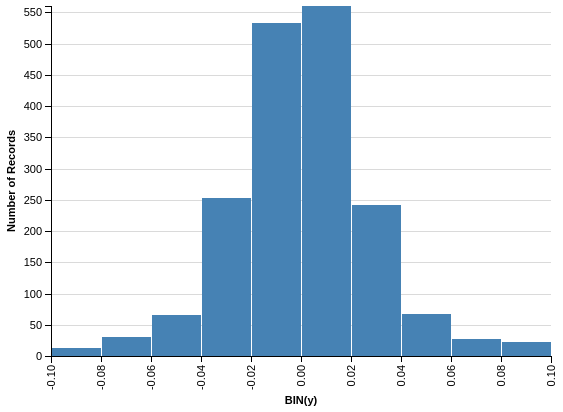

In [5]:
Chart('id2047.csv').mark_bar().encode(
    x=X('y:Q', bin=Bin(maxbins=10.0)),
    y='count(*)')

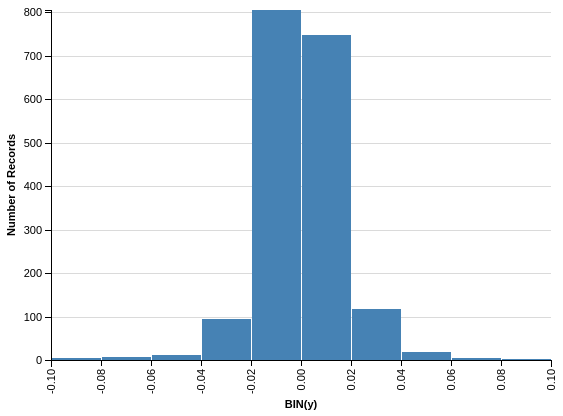

In [6]:
Chart('id318.csv').mark_bar().encode(
    x=X('y:Q', bin=Bin(maxbins=10.0)),
    y='count(*)')

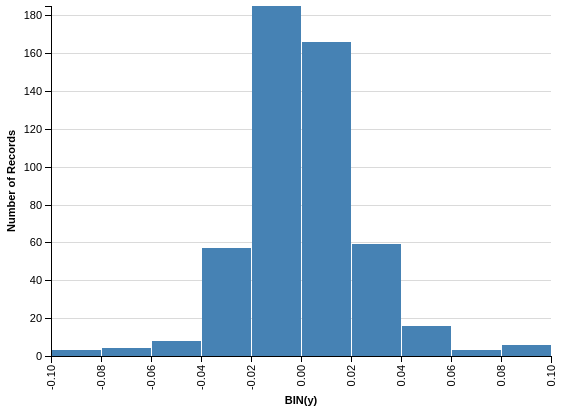

In [7]:
Chart('id838.csv').mark_bar().encode(
    x=X('y:Q', bin=Bin(maxbins=10.0)),
    y='count(*)')

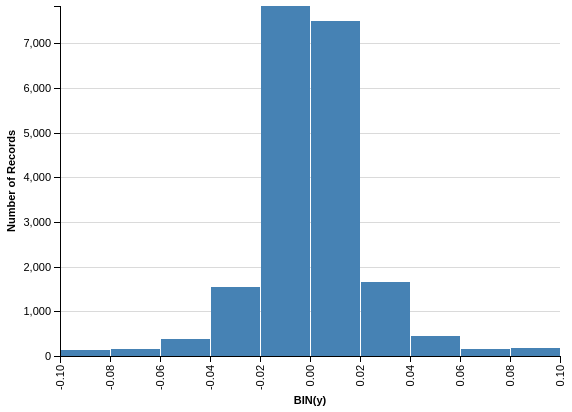

In [8]:
Chart('dfrandomsample.csv').mark_bar().encode(
    x=X('y:Q', bin=Bin(maxbins=10.0)),
    y='count(*)')

In [9]:
list(df.columns)

['id',
 'timestamp',
 'derived_0',
 'derived_1',
 'derived_2',
 'derived_3',
 'derived_4',
 'fundamental_0',
 'fundamental_1',
 'fundamental_2',
 'fundamental_3',
 'fundamental_5',
 'fundamental_6',
 'fundamental_7',
 'fundamental_8',
 'fundamental_9',
 'fundamental_10',
 'fundamental_11',
 'fundamental_12',
 'fundamental_13',
 'fundamental_14',
 'fundamental_15',
 'fundamental_16',
 'fundamental_17',
 'fundamental_18',
 'fundamental_19',
 'fundamental_20',
 'fundamental_21',
 'fundamental_22',
 'fundamental_23',
 'fundamental_24',
 'fundamental_25',
 'fundamental_26',
 'fundamental_27',
 'fundamental_28',
 'fundamental_29',
 'fundamental_30',
 'fundamental_31',
 'fundamental_32',
 'fundamental_33',
 'fundamental_34',
 'fundamental_35',
 'fundamental_36',
 'fundamental_37',
 'fundamental_38',
 'fundamental_39',
 'fundamental_40',
 'fundamental_41',
 'fundamental_42',
 'fundamental_43',
 'fundamental_44',
 'fundamental_45',
 'fundamental_46',
 'fundamental_47',
 'fundamental_48',
 'fund

Some of these are very funky looking plots... 

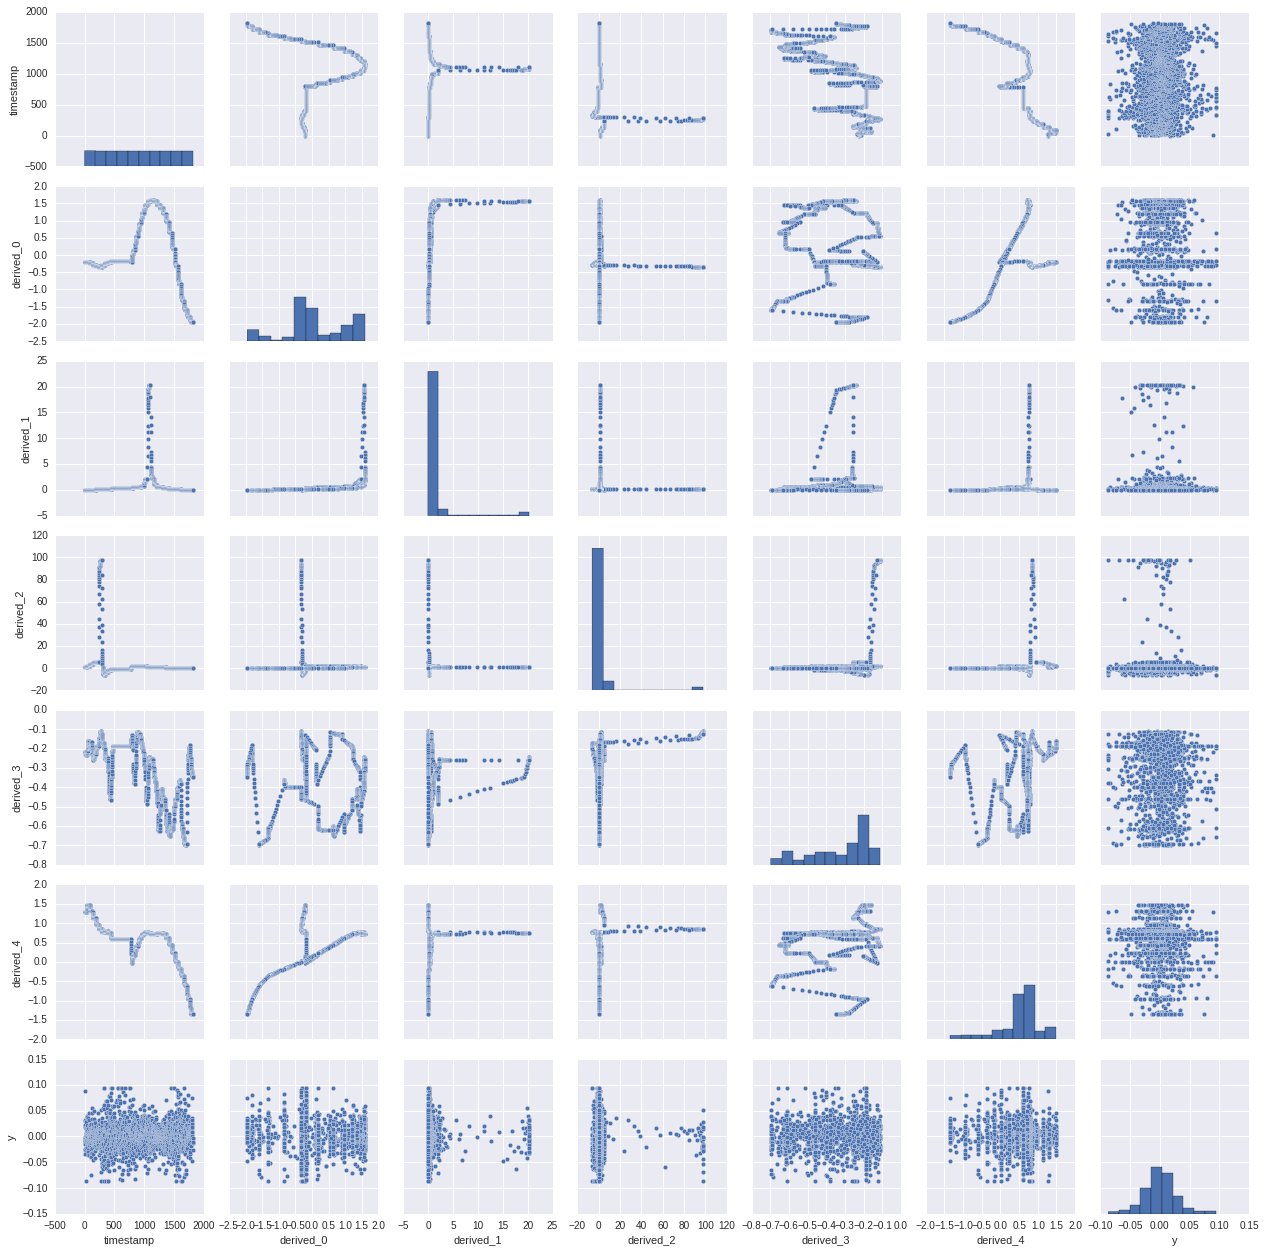

In [10]:
pcols = ['timestamp', 'derived_0', 'derived_1',
         'derived_2', 'derived_3', 'derived_4',
         'y']
g = sns.pairplot(df2047.loc[:,pcols])
g.savefig('derived_pairplot.png')

# Check for Correlated Variables

In [11]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so

fundamental_42  derived_3         6.491292e-07
derived_3       fundamental_42    6.491292e-07
fundamental_42  fundamental_34    7.266526e-07
fundamental_34  fundamental_42    7.266526e-07
fundamental_11  technical_1       1.672548e-06
technical_1     fundamental_11    1.672548e-06
fundamental_42  fundamental_7     2.033240e-06
fundamental_7   fundamental_42    2.033240e-06
derived_1       fundamental_42    2.131028e-06
fundamental_42  derived_1         2.131028e-06
derived_3       fundamental_41    2.223015e-06
fundamental_41  derived_3         2.223015e-06
fundamental_9   fundamental_31    2.280867e-06
fundamental_31  fundamental_9     2.280867e-06
fundamental_42  fundamental_33    2.310424e-06
fundamental_33  fundamental_42    2.310424e-06
fundamental_14  derived_3         3.066750e-06
derived_3       fundamental_14    3.066750e-06
fundamental_51  derived_2         3.442808e-06
derived_2       fundamental_51    3.442808e-06
fundamental_33  fundamental_29    3.884229e-06
fundamental_2

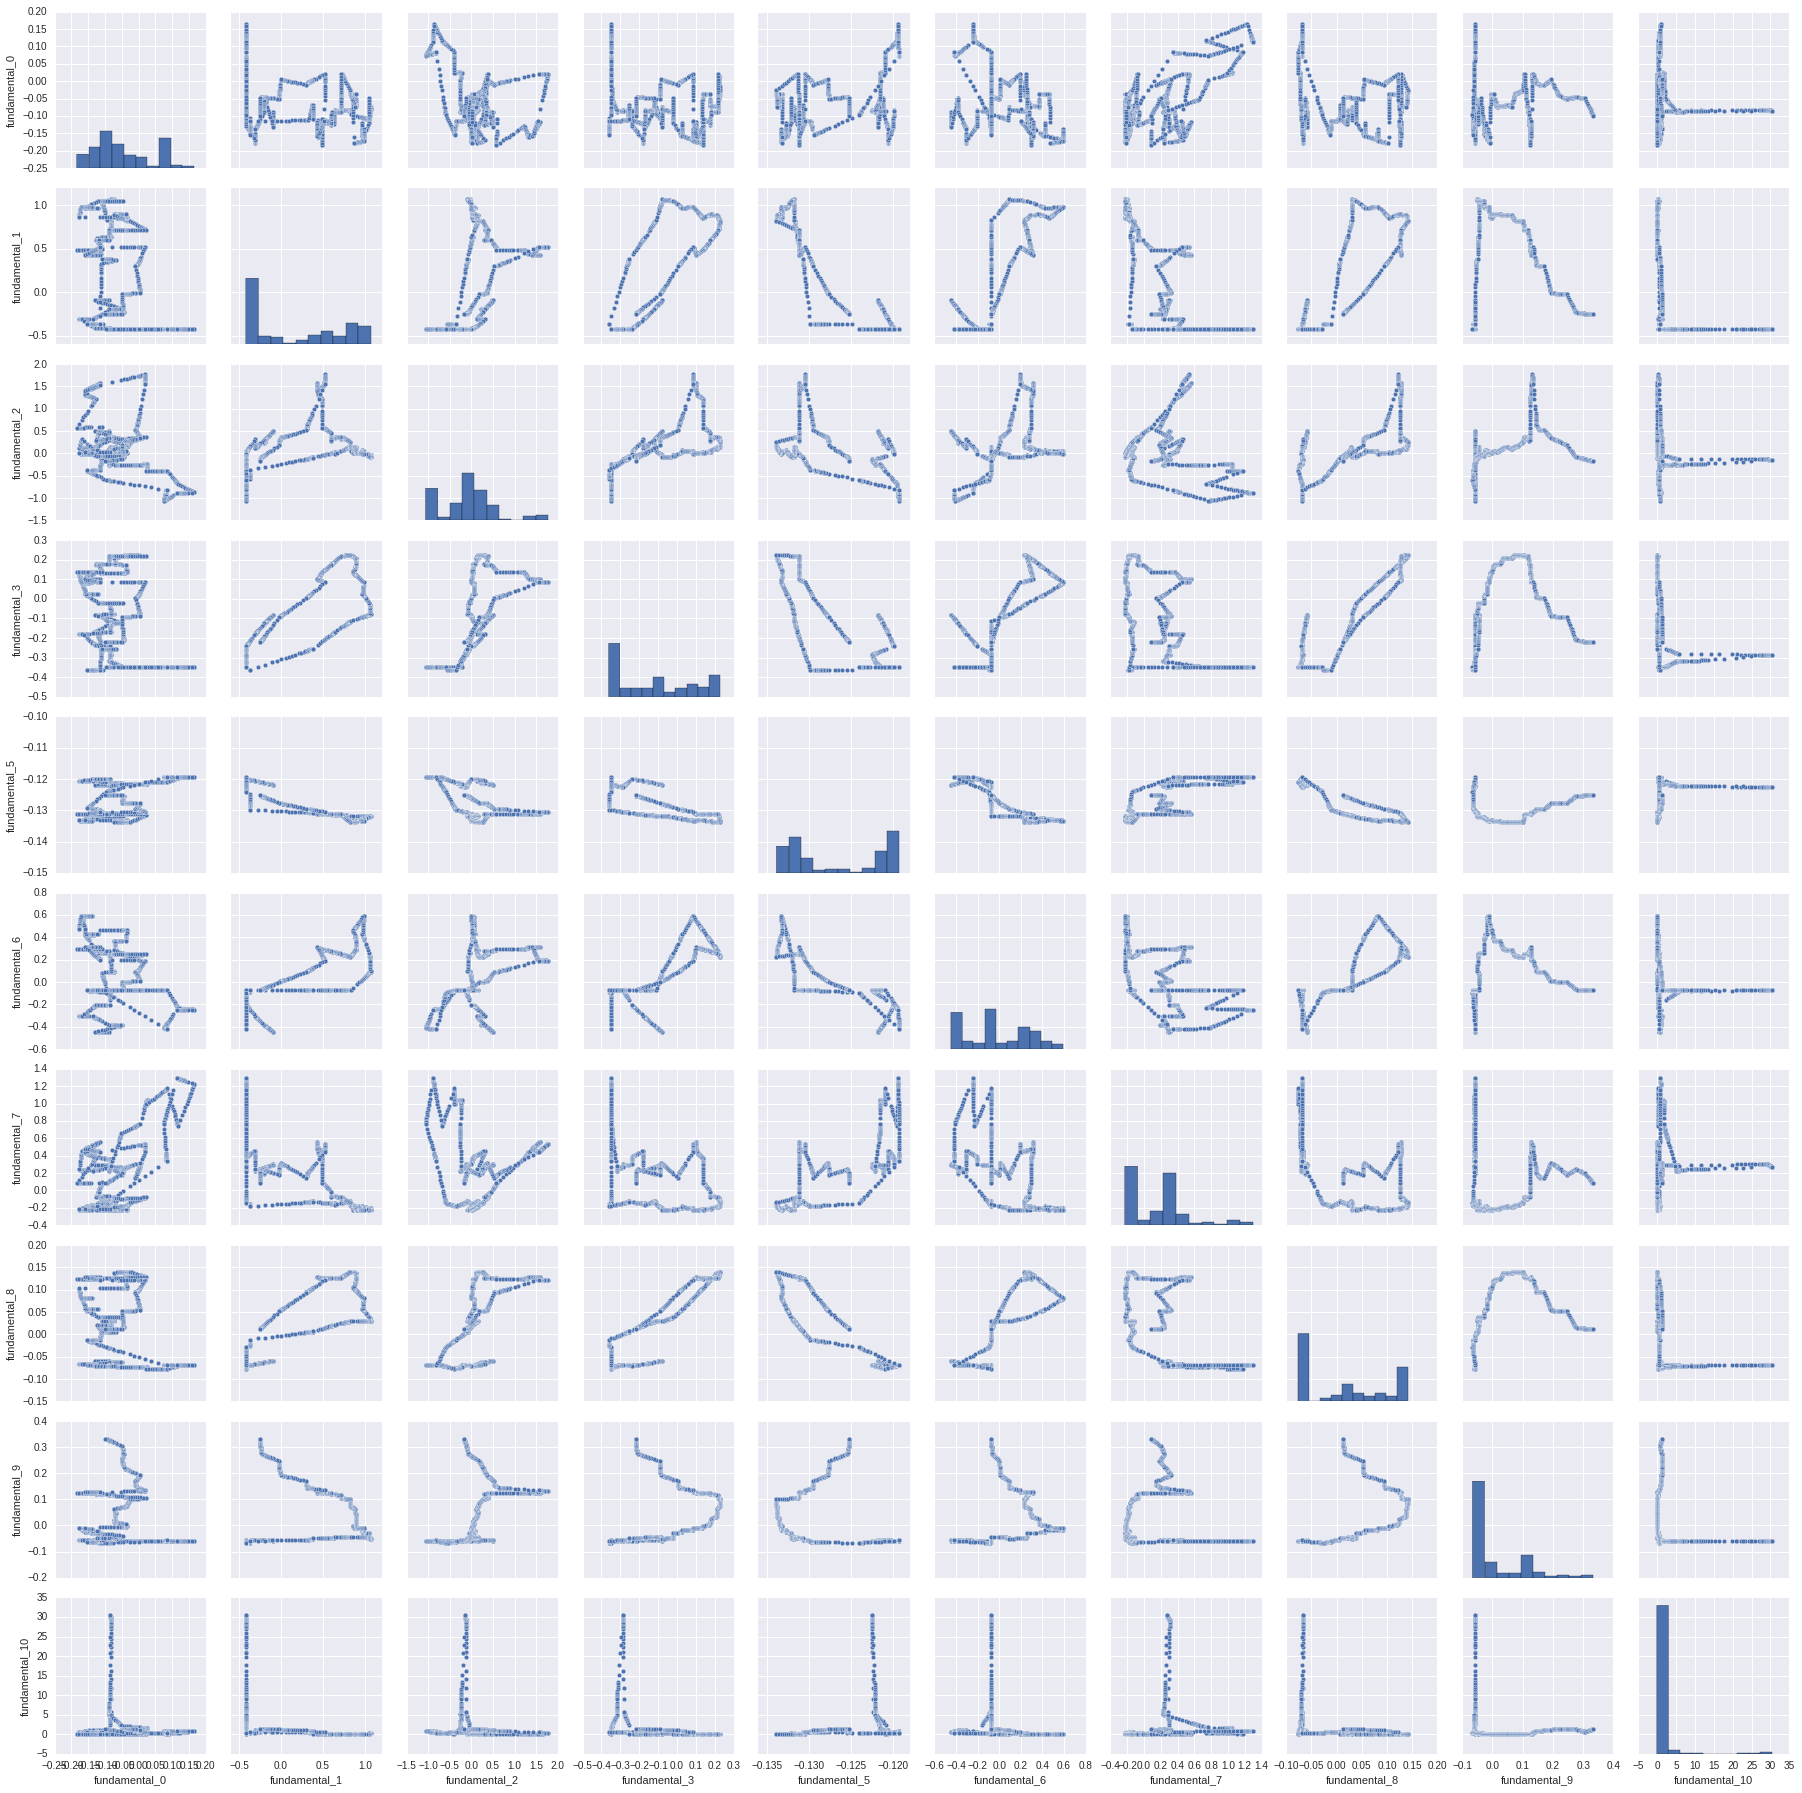

In [59]:
pcols = ['fundamental_0', 'fundamental_1', 'fundamental_2',
         'fundamental_3', 'fundamental_5', 'fundamental_6',
         'fundamental_7', 'fundamental_8', 'fundamental_9',
         'fundamental_10']
g = sns.pairplot(df2047.loc[:,pcols])
g.savefig('fun0-10_pairplot.png')

In [55]:
print('Records with NaN or Null values:',df.shape[0] - df.dropna().shape[0])
count = []
field = []

for i in df.columns:
    _ = df[i].isnull().sum()
    count.append(_)
    field.append(i)
null_count = pd.DataFrame({'field_name': field, 'null_count': count})

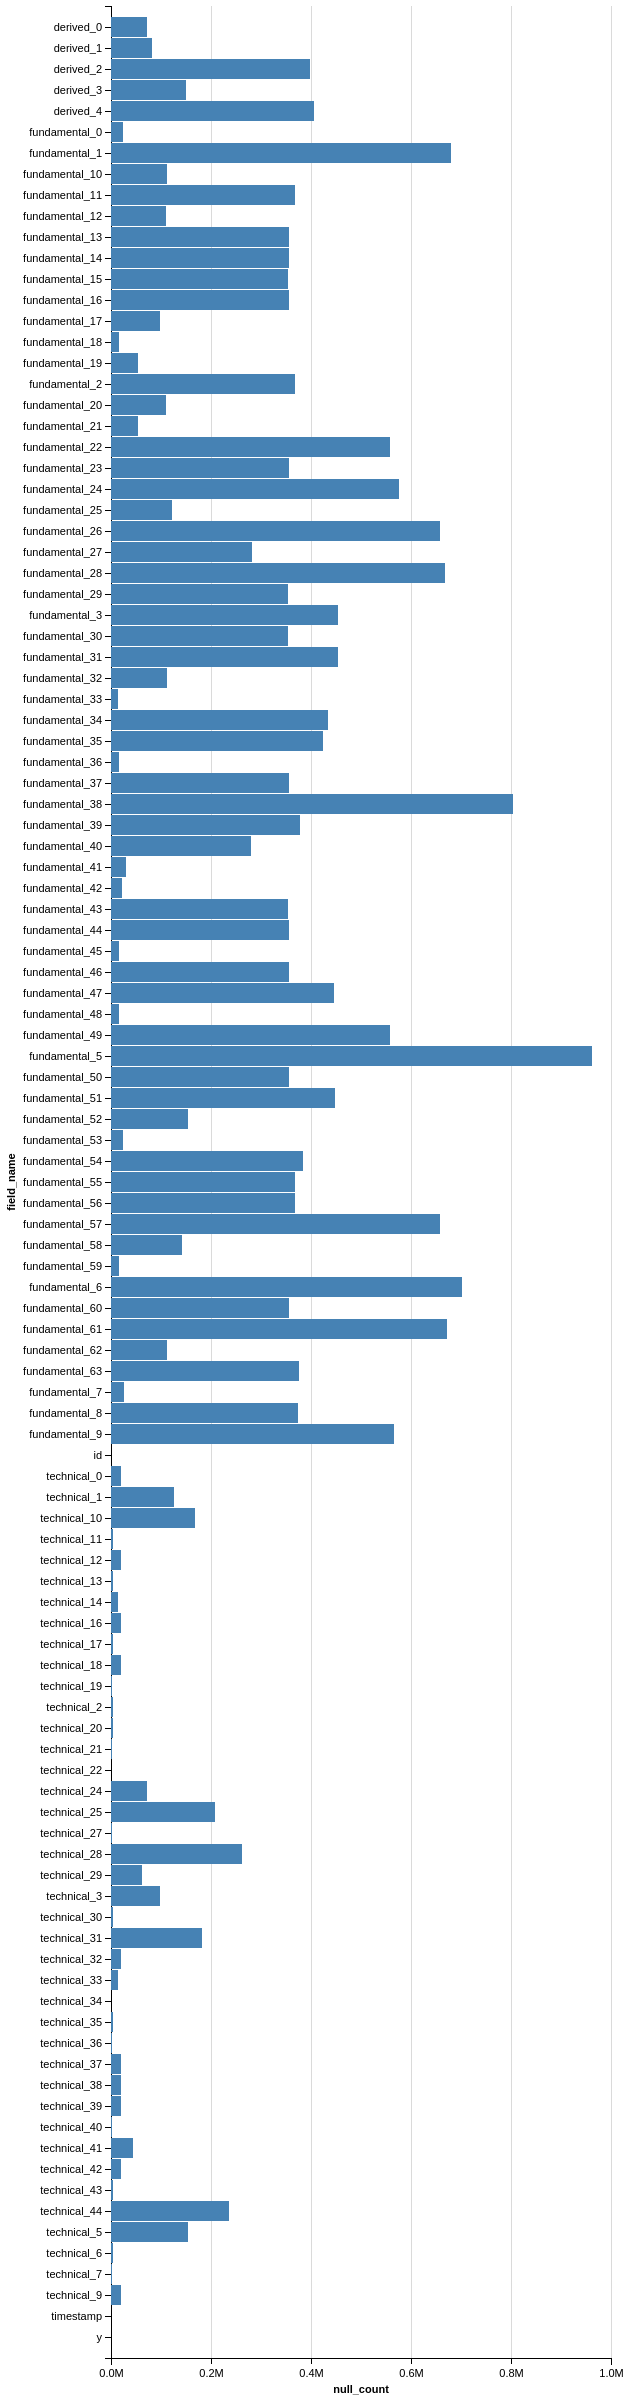

In [59]:
Chart(null_count).mark_bar(
).encode(
    y='field_name',
    x='null_count'
)

In [3]:
from sklearn.neighbors.kde import KernelDensity
kde = KernelDensity(bandwidth=0.04, metric='haversine',
                    kernel='gaussian', algorithm='ball_tree')